In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
c = pd.read_csv('customer_join.csv')
ul = pd.read_csv('use_log.csv')

In [3]:
ul.isnull().sum(), c.isnull().sum()

(log_id         0
 customer_id    0
 usedate        0
 dtype: int64,
 customer_id         0
 name                0
 class               0
 gender              0
 start_date          0
 end_date         2842
 campaign_id         0
 is_deleted          0
 class_name          0
 price               0
 campaign_name       0
 mean                0
 median              0
 amax                0
 amin                0
 flag1               0
 cal_date            0
 mem_period          0
 dtype: int64)

클러스터 사용 : K-Means

- 군집개수 : 4개
- min, max, median, mean 변수는 월 이용 횟수와 관련된 변수 : 1~8 사이의 값을 가짐
- mem_period 단위가 너무 커서 scaling

In [13]:
cc = c[['mean','median','amin','amax','mem_period']]
cc.head(), cc.shape

(       mean  median  amin  amax  mem_period
 0  4.833333     5.0     2     8   47.968131
 1  5.083333     5.0     3     7   47.968131
 2  4.583333     5.0     3     6   47.968131
 3  4.833333     4.5     2     7   47.968131
 4  3.916667     4.0     1     6   47.968131,
 (4192, 5))

In [14]:
scaler = StandardScaler()
scale_data = pd.DataFrame(scaler.fit_transform(cc), columns=['mean','median','amin','amax','mem_period'])
scale_data.head(), scale_data.shape

(       mean    median      amin      amax  mem_period
 0 -0.281206 -0.133676 -0.533620  0.081177    2.031859
 1 -0.140545 -0.133676 -0.021149 -0.379928    2.031859
 2 -0.421867 -0.133676 -0.021149 -0.841034    2.031859
 3 -0.281206 -0.400393 -0.533620 -0.379928    2.031859
 4 -0.796964 -0.667109 -1.046090 -0.841034    2.031859,
 (4192, 5))

In [6]:
km = KMeans(n_clusters=4, random_state=0)
cluster = km.fit(scale_data)

In [24]:
cc['cluster'] = cluster.labels_
cc

C:\Users\user\AppData\Local\Temp\ipykernel_20220\3554618193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['cluster'] = cluster.labels_


,월 평균,월별 중간값,월별 최소값,월별 최대값,회원기간,cluster
0,4.833333,5.0,2,8,47.968131,1
1,5.083333,5.0,3,7,47.968131,1
2,4.583333,5.0,3,6,47.968131,1
3,4.833333,4.5,2,7,47.968131,1
4,3.916667,4.0,1,6,47.968131,1
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1.544180,0
4188,10.000000,10.0,10,10,1.544180,0
4189,8.000000,8.0,8,8,1.544180,0
4190,11.000000,11.0,11,11,1.544180,0


In [25]:
cc.rename(columns={'mean':'월 평균','median':'월별 중간값', 'amin':'월별 최소값', 'amax':'월별 최대값', 'mem_period':'회원기간'}, inplace=True)
cc

C:\Users\user\AppData\Local\Temp\ipykernel_20220\738254444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc.rename(columns={'mean':'월 평균','median':'월별 중간값', 'amin':'월별 최소값', 'amax':'월별 최대값', 'mem_period':'회원기간'}, inplace=True)


,월 평균,월별 중간값,월별 최소값,월별 최대값,회원기간,cluster
0,4.833333,5.0,2,8,47.968131,1
1,5.083333,5.0,3,7,47.968131,1
2,4.583333,5.0,3,6,47.968131,1
3,4.833333,4.5,2,7,47.968131,1
4,3.916667,4.0,1,6,47.968131,1
...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1.544180,0
4188,10.000000,10.0,10,10,1.544180,0
4189,8.000000,8.0,8,8,1.544180,0
4190,11.000000,11.0,11,11,1.544180,0


In [9]:
cc.groupby('cluster').count()

,월 평균,월별 중간값,월별 최소값,월별 최대값,회원기간
cluster,,,,,
0,846,846,846,846,846
1,1251,1251,1251,1251,1251
2,759,759,759,759,759
3,1336,1336,1336,1336,1336


그룹 3번에 해당하는 수가 1336명으로 가장 많고 그룹1, 그룹0, 그룹2 순으로 사람이 많음

In [10]:
cc.groupby('cluster').mean()

,월 평균,월별 중간값,월별 최소값,월별 최대값,회원기간
cluster,,,,,
0,8.054608,8.039598,6.160757,10.009456,7.809637
1,4.676091,4.670264,2.153477,7.231815,37.819727
2,3.049270,2.882740,1.652174,4.745718,10.147960
3,5.522518,5.373129,2.686377,8.743263,15.688428


그룹별 특징을 정의해서 프로모션할 때 사용 가능

### 차원 축소
- feature 5개 -> 2차원으로 줄이기

In [18]:
x = scale_data.copy()
pca = PCA(n_components=2, random_state=0)
x_pca = pca.fit_transform(x)

In [19]:
# 1개의 리스트에 5개 값이 있어야 하는데 차원축소로 2차원으로 줄였기 때문에 값이 2개만 있음
x_pca

array([[-0.82348238, -1.95542865],
       [-0.71143886, -1.79654608],
       [-1.06487338, -1.65597187],
       ...,
       [ 3.03270969,  1.14925646],
       [ 6.08668346,  0.58828694],
       [ 5.06914574,  0.77750796]])

In [29]:
pca_x = pd.DataFrame(x_pca)
pca_x['cluster'] = cc['cluster']
pca_x.head(), pca_x.shape

(          0         1  cluster
 0 -0.823482 -1.955429        1
 1 -0.711439 -1.796546        1
 2 -1.064873 -1.655972        1
 3 -1.164117 -1.805864        1
 4 -2.020158 -1.664221        1,
 (4192, 3))

c:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


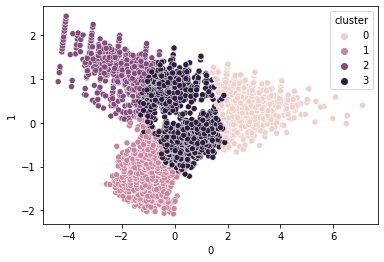

In [28]:
axs = plt.subplot()
axs = sns.scatterplot(0, 1, hue='cluster', data = pca_x)

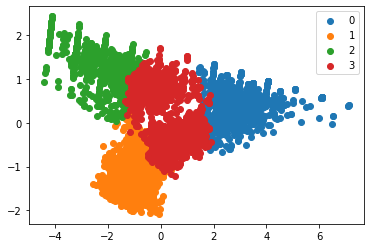

In [46]:
for i in sorted(pca_x['cluster'].unique()):
    tmp = pca_x.loc[pca_x['cluster']==i]
    plt.scatter(tmp[0], tmp[1])
    plt.legend(sorted(pca_x['cluster'].unique()))
    # sns.scatterplot(0, 1, hue=i, data=pca_x)

차원축소가 잘 되지 않을 경우(주성분의 개수가 적절하지 않을 경우) : 그래프의 data들이 겹쳐져서 그려짐

### 클러스터 별 회원 특징 파악 - 탈퇴, 정기이용 여부

In [33]:
cc_join = pd.concat([cc,c], axis=1)
cc_join.head()

,월 평균,월별 중간값,월별 최소값,월별 최대값,회원기간,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,amax,amin,flag1,cal_date,mem_period
0,4.833333,5.0,2,8,47.968131,1,OA832399,XXXX,C01,F,...,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47.968131
1,5.083333,5.0,3,7,47.968131,1,PL270116,XXXXX,C01,M,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47.968131
2,4.583333,5.0,3,6,47.968131,1,OA974876,XXXXX,C01,M,...,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47.968131
3,4.833333,4.5,2,7,47.968131,1,HD024127,XXXXX,C01,F,...,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47.968131
4,3.916667,4.0,1,6,47.968131,1,HD661448,XXXXX,C03,F,...,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47.968131


In [37]:
# 탈퇴한 회원들의 groupby
new_df = cc_join.groupby(['cluster','is_deleted'], as_index=False).count()[['cluster','is_deleted','customer_id']]  
# as_index=False 안해주면 cluster, is_deleted가 인덱스로 들어감
new_df

,cluster,is_deleted,customer_id
0,0,0,827
1,0,1,19
2,1,0,1230
3,1,1,21
4,2,1,759
5,3,0,785
6,3,1,551


In [45]:
len(cc_join[cc_join['cluster']==2])

759

In [58]:
d0 = (new_df['is_deleted']==0)
d1 = (new_df['is_deleted']==1)

for i in range(0,4):
    tmp = (new_df['cluster']==i)
    print('cluster'+str(i)+'탈퇴회원 비율 : '+str(round((new_df.loc[(tmp&d1),'customer_id'].sum()*100/new_df.loc[tmp, 'customer_id'].sum()),2)))
    print('cluster'+str(i)+'유지회원 비율 : '+str(round((new_df.loc[(tmp&d0),'customer_id'].sum()*100/new_df.loc[tmp, 'customer_id'].sum()),2))+'\n')

cluster0탈퇴회원 비율 : 2.25
cluster0유지회원 비율 : 97.75

cluster1탈퇴회원 비율 : 1.68
cluster1유지회원 비율 : 98.32

cluster2탈퇴회원 비율 : 100.0
cluster2유지회원 비율 : 0.0

cluster3탈퇴회원 비율 : 41.24
cluster3유지회원 비율 : 58.76



- 클러스터 0 : 초반에 열심히 이용 (이용횟수가 많고 유지회원이 많지만 평균회원기간이 짧음 -> 처음만 열심히 이용)
- 클러스터 1 : 안정적인 그룹 (회원유지기간이 길고, 이용횟수는 적음, 유지회원은 많음)
- 클러스터 2 : 탈퇴자 그룹(100% 탈퇴, 가장 짧게 이용)
- 클러스터 3 : 회원유지기간이 길고, 탈퇴회원과 유지회원이 비슷한 그룹

In [55]:
new_df2 = cc_join.groupby(['cluster','flag1'], as_index=False).count()[['cluster','flag1','customer_id']]
new_df2

,cluster,flag1,customer_id
0,0,0,52
1,0,1,794
2,1,0,2
3,1,1,1249
4,2,0,496
5,2,1,263
6,3,0,229
7,3,1,1107


In [60]:
flag0 = (new_df2['flag1']==0)   # 정기적으로 사용하지 않는 회원
flag1 = (new_df2['flag1']==1)   # 정기적으로 사용하는 회원

for i in range(0,4):
    tmp = (new_df2['cluster']==i)
    print('cluster'+str(i)+'정기적으로 사용하는 회원 비율 : '+str(round((new_df2.loc[(tmp&flag1),'customer_id'].sum()*100/new_df2.loc[tmp, 'customer_id'].sum()),2)))
    print('cluster'+str(i)+'정기적으로 사용하지 않는 회원 비율 : '+str(round((new_df2.loc[(tmp&flag0),'customer_id'].sum()*100/new_df2.loc[tmp, 'customer_id'].sum()),2))+'\n')

cluster0정기적으로 사용하는 회원 비율 : 93.85
cluster0정기적으로 사용하지 않는 회원 비율 : 6.15

cluster1정기적으로 사용하는 회원 비율 : 99.84
cluster1정기적으로 사용하지 않는 회원 비율 : 0.16

cluster2정기적으로 사용하는 회원 비율 : 34.65
cluster2정기적으로 사용하지 않는 회원 비율 : 65.35

cluster3정기적으로 사용하는 회원 비율 : 82.86
cluster3정기적으로 사용하지 않는 회원 비율 : 17.14



- 클러스터 0 : 초반에 불타오르는 그룹(정기 94%, 비정기 6%)
- 클러스터 1 : 안정적인 그룹(거의 100% 정기)
- 클러스터 2 : 가장 이용이 적은 그룹(정기 35%, 비정기 65%)
- 클러스터 3 : 유지, 탈퇴 비율이 비슷한 그룹(정기 83%, 비정기 17%)

- -> 경영학적으로 기존고객을 유지하는 비용이 덜 들어가기 때문에 0,1 그룹에 프로모션을 주는 것이 더 효율적이다